In [1]:
import pandas as pd
import numpy as np
from utils.connect import get_data
# from utils.tools import  CustomOneHotEncoder, CustomRobustScaler,CustomLabelEncoder,train_test_val_split
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=.8)
sns.set_style("ticks")
sns.set_palette("colorblind")


Driver={ODBC Driver 18 for SQL Server};Server=unasam_db;Database=Itunasam;UID=sa;PWD=Unasam2021;Trusted_Connection=no;Encrypt=no;TrustServerCertificate=no;Connection Timeout=30;


ProgrammingError: ('42000', '[42000] [Microsoft][ODBC Driver 18 for SQL Server][SQL Server]Cannot open database "Itunasam" requested by the login. The login failed. (4060) (SQLDriverConnect)')

In [263]:
sql = """
select 

clz.CargaLectiva,clz.Sede,clz.Escuela,clz.Curricula,
clz.Curso,c.Nombre as NombreCurso,clz.Semestre,clz.Seccion,clz.Grupo,
c.NumeroCreditos,c.Ciclo,c.TipoCurso,c.HorasTeoria,c.HorasPractica,c.HorasLaboratorio,t.sexo as Sexo,
CONCAT(h.Dia,DATEPART(HOUR,h.HoraIni),'-',DATEPART(HOUR,h.HoraFin)) as Horario,
h.Turno 
from dbo.CargaLectivaZet as clz 
inner join dbo.Curso as c on c.Curso=clz.Curso and c.Curricula=clz.Curricula and c.Escuela=clz.Escuela
inner join dbo.Horario as h on clz.Horario=h.Horario
inner join dbo.Trabajador as t on t.Trabajador=clz.Trabajador
order by clz.Semestre desc ;"""
df_all=get_data(sql)
df_all['CargaLectiva']=df_all['CargaLectiva'].astype('str')
df_all

,CargaLectiva,Sede,Escuela,Curricula,Curso,NombreCurso,Semestre,Seccion,Grupo,NumeroCreditos,Ciclo,TipoCurso,HorasTeoria,HorasPractica,HorasLaboratorio,Sexo,Horario,Turno
0,689182,01,07,07,VT-T02,TOPOGRAFÍA II,2022-2,2,1,3.0,IV,O,1.0,4.0,0.0,M,MI7-8,M
1,689264,01,07,07,CF-B01,FÍSICA I,2022-2,1,1,5.0,II,O,3.0,4.0,0.0,M,MA9-10,M
2,689250,01,06,07,060523,FÍSICA I,2022-2,2,1,4.0,II,O,3.0,2.0,0.0,M,MI18-19,T
3,689272,01,07,07,CF-B03,FÍSICA III,2022-2,2,1,5.0,IV,O,3.0,4.0,0.0,M,VI9-10,M
4,689183,01,07,07,VT-T02,TOPOGRAFÍA II,2022-2,2,1,3.0,IV,O,1.0,4.0,0.0,M,MI8-9,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253203,82901,01,10,04,EO-F09,OBSTETRICIA III,2006-1,1,1,4.0,VIII,O,3.0,6.0,0.0,M,MI19-20,T
253204,82903,01,10,04,EO-F09,OBSTETRICIA III,2006-1,1,1,4.0,VIII,O,3.0,6.0,0.0,M,MI20-21,T
253205,83054,01,08,02,MM-L05,MAQUINARIA Y EQUIPO MINERO,2006-1,1,1,3.0,V,O,2.0,3.0,0.0,M,MI10-11,M
253206,83056,01,08,02,MM-L05,MAQUINARIA Y EQUIPO MINERO,2006-1,1,1,3.0,V,O,2.0,3.0,0.0,M,MI11-12,M


In [290]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253208 entries, 0 to 253207
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CargaLectiva      253208 non-null  object 
 1   Sede              253208 non-null  object 
 2   Escuela           253208 non-null  object 
 3   Curricula         253208 non-null  object 
 4   Curso             253208 non-null  object 
 5   NombreCurso       253208 non-null  object 
 6   Semestre          253208 non-null  object 
 7   Seccion           253208 non-null  object 
 8   Grupo             253208 non-null  object 
 9   NumeroCreditos    253208 non-null  float64
 10  Ciclo             253208 non-null  object 
 11  TipoCurso         253208 non-null  object 
 12  HorasTeoria       253208 non-null  float64
 13  HorasPractica     253208 non-null  float64
 14  HorasLaboratorio  253208 non-null  float64
 15  Sexo              253208 non-null  object 
 16  Horario           25

In [289]:
df_all.describe()

,NumeroCreditos,HorasTeoria,HorasPractica,HorasLaboratorio
count,253208.000000,253208.000000,253208.000000,253208.000000
mean,3.725641,2.461431,2.833489,0.018096
std,1.152007,0.927186,2.248612,0.317439
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,0.000000
50%,4.000000,2.000000,2.000000,0.000000
75%,4.000000,3.000000,3.000000,0.000000
max,20.000000,5.000000,40.000000,12.000000


/tmp/ipykernel_16015/2645371629.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(f.get_xticklabels(), rotation=90)


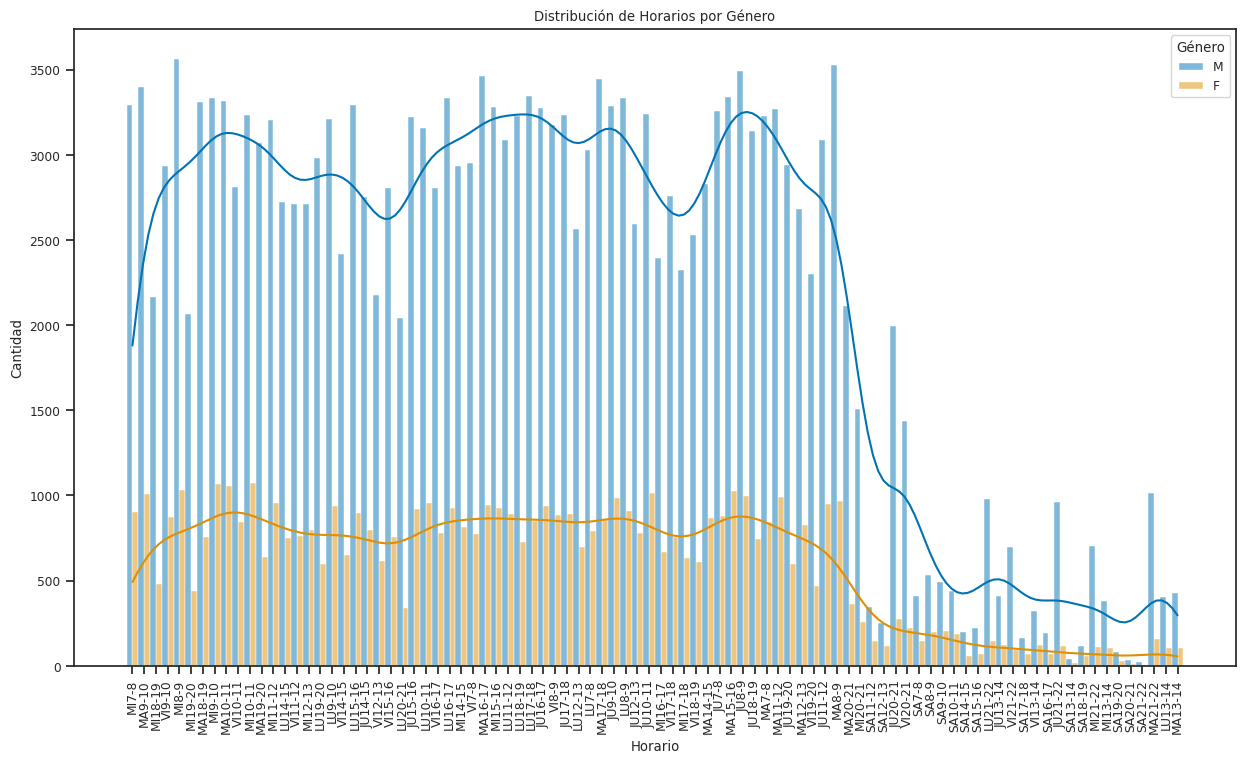

In [313]:

f=sns.histplot(
    df_all,
    x="Horario",
    hue="Sexo",
    kde=True, 
    multiple="dodge",
    discrete=True,
)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title("Distribución de Horarios por Género")
f.set_xlabel("Horario")
f.set_ylabel("Cantidad")
f.legend_.set_title("Género")
f.figure.canvas.figure.set_figwidth(15)

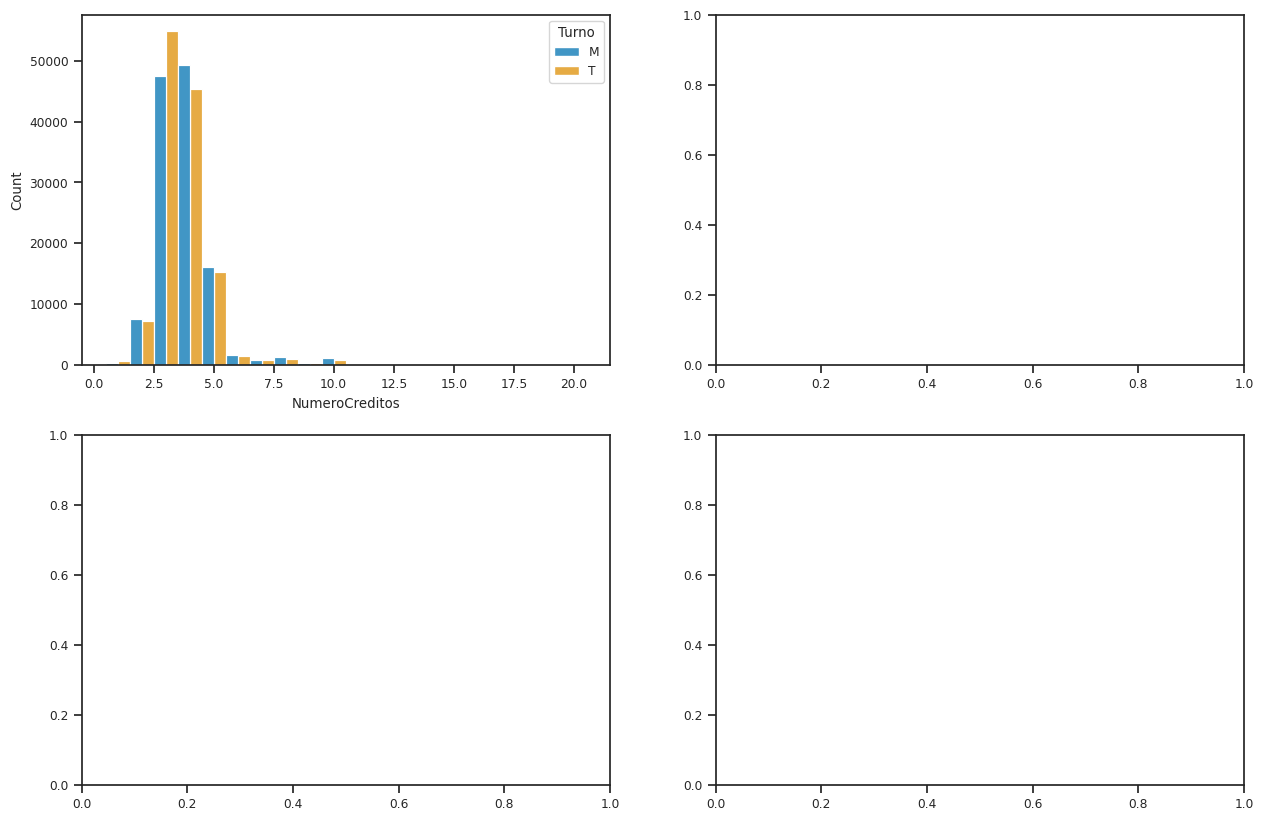

In [325]:
# grafica de preferencia de varones y mujeres en en los turno de mañana y tarde

fig,ax=plt.subplots(2,2,figsize=(15,10))
f = sns.histplot(
    df_all,
    x="NumeroCreditos",
    hue="Turno",
   discrete=True,
   multiple="dodge",
   ax=ax[0,0]
)


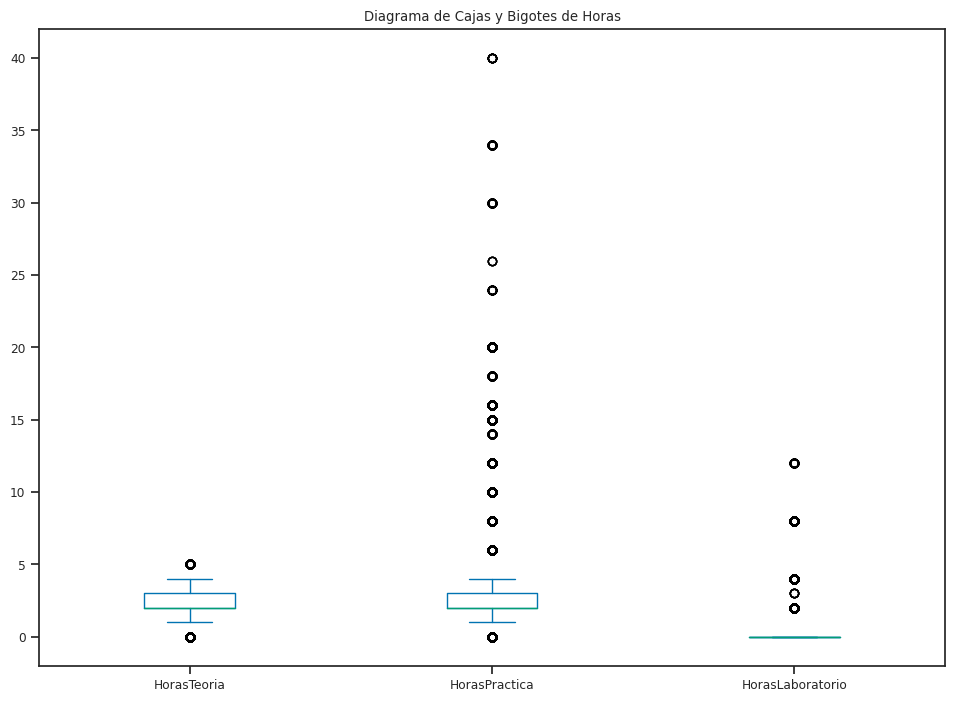

In [231]:
df_all[['HorasTeoria', 'HorasPractica', 'HorasLaboratorio']].plot.box()
plt.title('Diagrama de Cajas y Bigotes de Horas')
plt.show()

<Axes: >

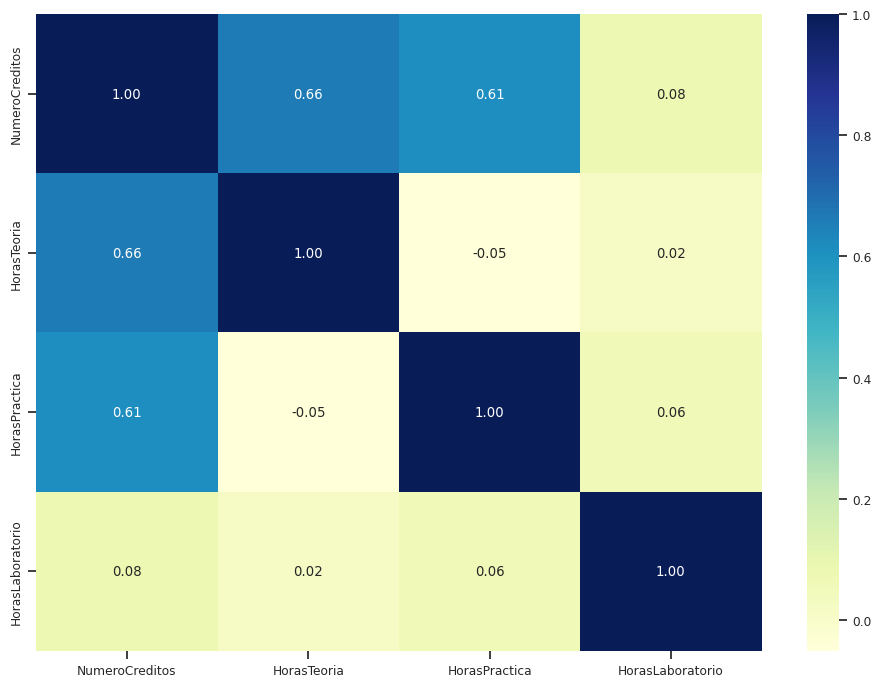

In [237]:

sns.heatmap(df_all.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap="YlGnBu")


/home/carlos/miniconda3/envs/unasam/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


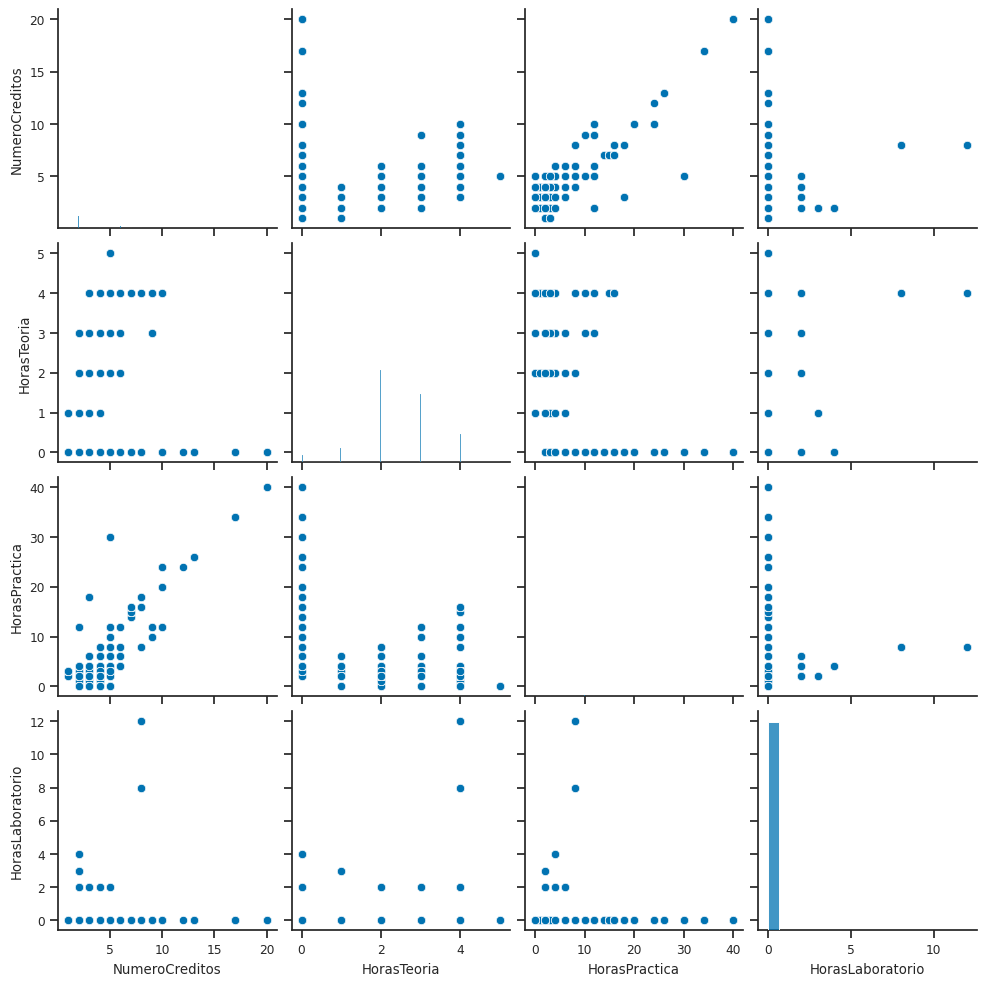

In [238]:
sns.pairplot(df_all.select_dtypes(include=[np.number]),)

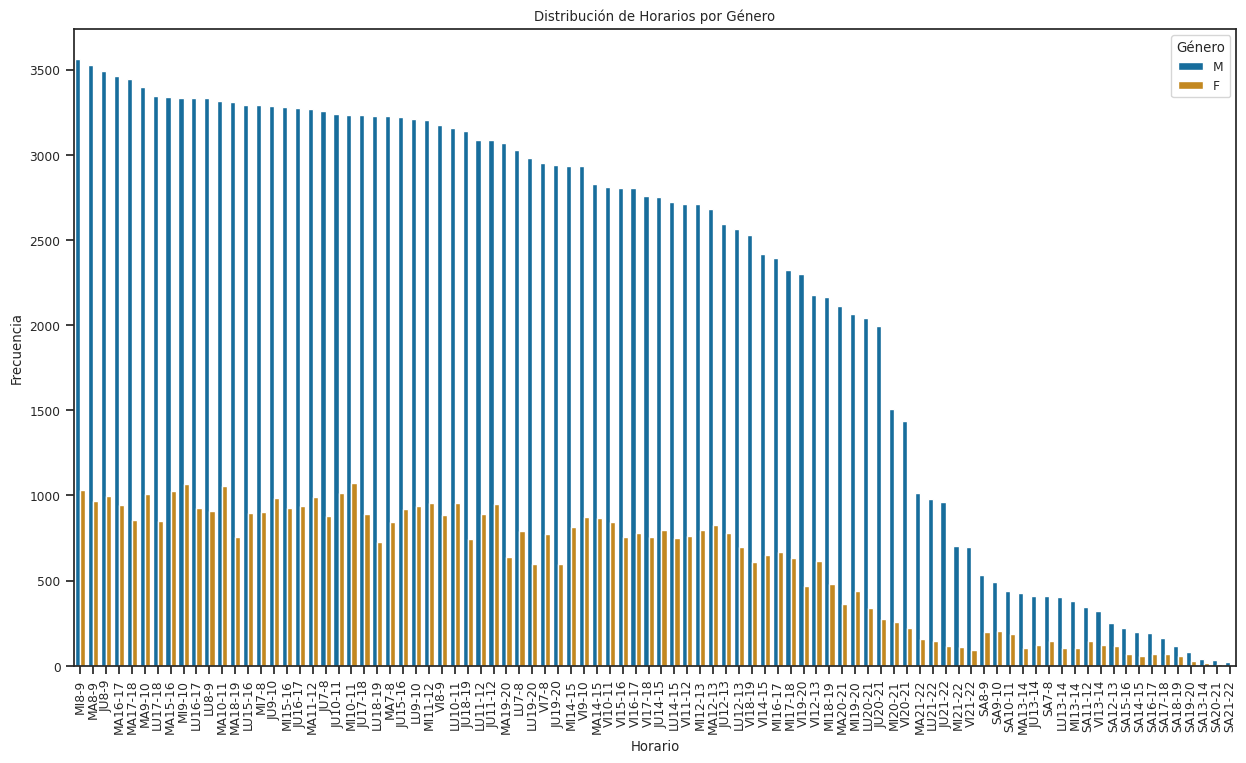

In [247]:
f = sns.barplot(
    df_all.groupby(["Horario", "Sexo"])
    .size()
    .reset_index(name="Cantidad")
    .sort_values(by=["Cantidad"], ascending=False),
    x="Horario",
    y="Cantidad",
    hue="Sexo",
)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title("Distribución de Horarios por Género")
f.set_xlabel("Horario")
f.set_ylabel("Frecuencia")
f.legend(
    title="Género",
    loc="upper right",
)
f.figure.canvas.figure.set_figwidth(15)